# ωᥱℓᥴ𐐫꧑ᥱ To The Data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import scipy
import seaborn as sns

# Task 1: Data Loading.

In [3]:
df = pd.read_csv("Ecommerce.csv",engine='python')
print(df.head(5))
print(df.tail(5))

   Shipment_ID  Order_Date Region       City Delivery_Partner Shipping_Mode  \
0       900000  2022-09-05  North  Ahmedabad     Ecom Express      Standard   
1       900001  2023-03-29   West  Ahmedabad         BlueDart      Standard   
2       900002  2022-03-23  South  Hyderabad         BlueDart      Standard   
3       900003  2024-01-25   West  Hyderabad     Ecom Express      Standard   
4       900004  2023-11-11  South     Mumbai     Ecom Express      Standard   

   Delivery_Time_Days  Order_Value Delivery_Status  Customer_Rating  
0                 8.0    171575.41       Delivered              4.0  
1                10.0      8628.10         Delayed              3.0  
2                12.0    161353.25       Cancelled              3.0  
3                14.0     57509.48         Delayed              2.0  
4                14.0    154628.04       Delivered              1.0  
       Shipment_ID  Order_Date   Region     City Delivery_Partner  \
73495       901870  2022-08-09     E

In [4]:
pd.read_csv("Ecommerce.csv")

,Shipment_ID,Order_Date,Region,City,Delivery_Partner,Shipping_Mode,Delivery_Time_Days,Order_Value,Delivery_Status,Customer_Rating
0,900000,2022-09-05,North,Ahmedabad,Ecom Express,Standard,8.0,171575.41,Delivered,4.0
1,900001,2023-03-29,West,Ahmedabad,BlueDart,Standard,10.0,8628.10,Delayed,3.0
2,900002,2022-03-23,South,Hyderabad,BlueDart,Standard,12.0,161353.25,Cancelled,3.0
3,900003,2024-01-25,West,Hyderabad,Ecom Express,Standard,14.0,57509.48,Delayed,2.0
4,900004,2023-11-11,South,Mumbai,Ecom Express,Standard,14.0,154628.04,Delivered,1.0
...,...,...,...,...,...,...,...,...,...,...
73495,901870,2022-08-09,East,Kolkata,Ecom Express,Express,7.0,7879.04,Delivered,4.0
73496,915961,2023-07-20,West,Pune,Delhivery,Express,6.0,145610.57,Delivered,3.0
73497,909351,2023-09-17,South,Mumbai,Ecom Express,Express,14.0,140215.59,Delivered,3.0
73498,966364,2021-10-20,Central,Pune,BlueDart,Same-Day,8.0,132471.00,Delayed,5.0


# Task 2: Data Cleaning

In [6]:
print('\nMissing Values:')
print(df.isnull().sum())


Missing Values:
Shipment_ID               0
Order_Date                0
Region                14757
City                   8255
Delivery_Partner       7538
Shipping_Mode             0
Delivery_Time_Days     4848
Order_Value               0
Delivery_Status        3616
Customer_Rating        7383
dtype: int64


In [7]:
for col in ['Delivery_Time_Days', 'Order_Value', 'Customer_Rating']:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\mantr\AppData\Local\Temp\ipykernel_18184\2356433511.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [11]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print('Duplicates Removed:', initial_rows - df.shape[0])

Duplicates Removed: 0


In [12]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [13]:
print('\nSummary Statistics:')
df.describe()


Summary Statistics:


,Shipment_ID,Order_Date,Delivery_Time_Days,Order_Value,Customer_Rating
count,70000.000000,70000,70000.000000,70000.000000,70000.000000
mean,934999.500000,2022-10-11 23:49:39.154285568,7.571871,99874.292027,3.315271
min,900000.000000,2021-06-01 00:00:00,1.000000,302.070000,1.000000
25%,917499.750000,2022-02-05 00:00:00,4.000000,49814.912500,3.000000
50%,934999.500000,2022-10-12 00:00:00,8.000000,99813.025000,3.000000
75%,952499.250000,2023-06-18 00:00:00,11.000000,149743.875000,4.000000
max,969999.000000,2024-02-25 00:00:00,14.000000,199999.600000,5.000000
std,20207.403759,NaN,3.908423,57653.402459,1.111116


In [14]:
print('\nRegion Distribution:')
print(df['Region'].value_counts())


Region Distribution:
Region
North      11262
South      11219
West       11203
Central    11144
East       11112
Name: count, dtype: int64


In [15]:
print('\nDelivery Partner Distribution:')
print(df['Delivery_Partner'].value_counts())


Delivery Partner Distribution:
Delivery_Partner
Ecom Express        12687
Amazon Logistics    12580
Delhivery           12571
XpressBees          12498
BlueDart            12485
Name: count, dtype: int64


# Task 3: Business / Logistics Analysis

In [17]:
region_perf = df.groupby('Region')['Delivery_Time_Days'].mean().sort_values()

In [18]:
partner_perf = df.groupby('Delivery_Partner')['Delivery_Time_Days'].mean().sort_values()

In [19]:
shipping_perf = df.groupby('Shipping_Mode')['Delivery_Time_Days'].mean()

In [20]:
order_status_perf = df.groupby('Delivery_Status')['Order_Value'].mean()

In [21]:
rating_perf = df.groupby('Customer_Rating')['Delivery_Time_Days'].mean()

# Task 4: Data Visualization

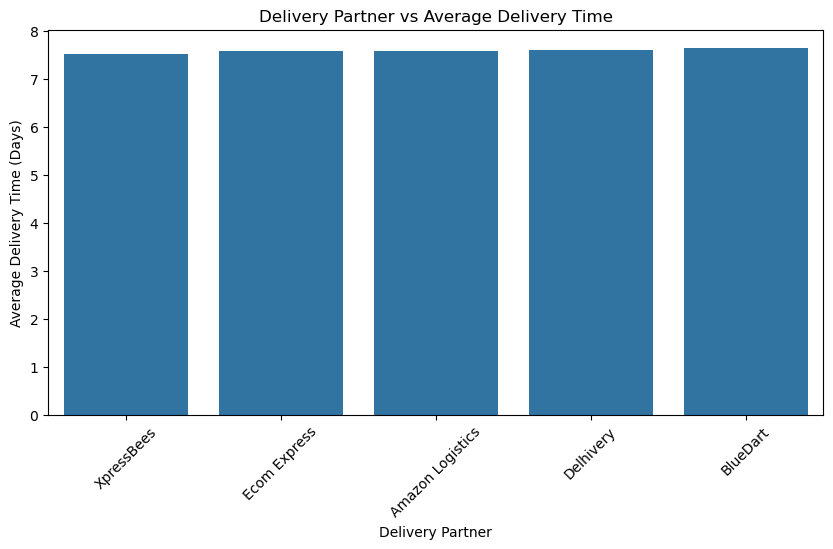

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=partner_perf.index, y=partner_perf.values)
plt.title('Delivery Partner vs Average Delivery Time')
plt.xlabel('Delivery Partner')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)
plt.show()

C:\Users\mantr\AppData\Local\Temp\ipykernel_18184\3538853201.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order_Date').resample('M')['Shipment_ID'].count().plot()


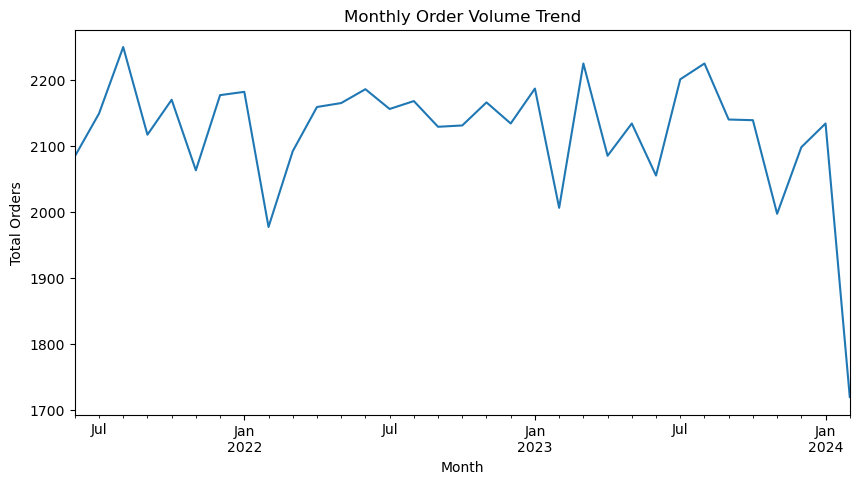

In [23]:
plt.figure(figsize=(10,5))
df.set_index('Order_Date').resample('M')['Shipment_ID'].count().plot()
plt.title('Monthly Order Volume Trend')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.show()

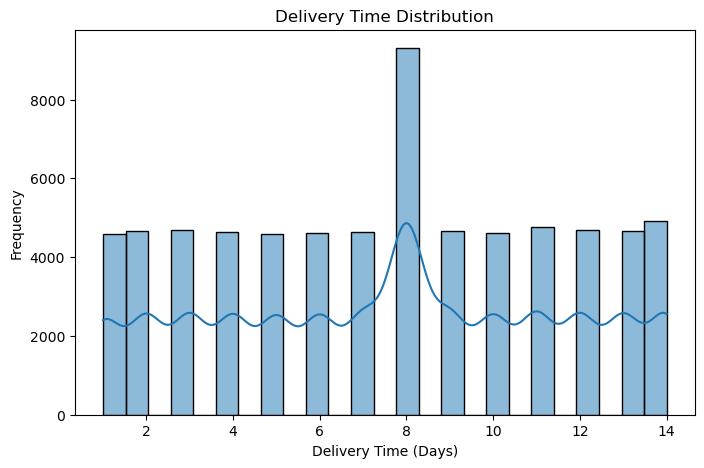

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time_Days'], bins=25, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()

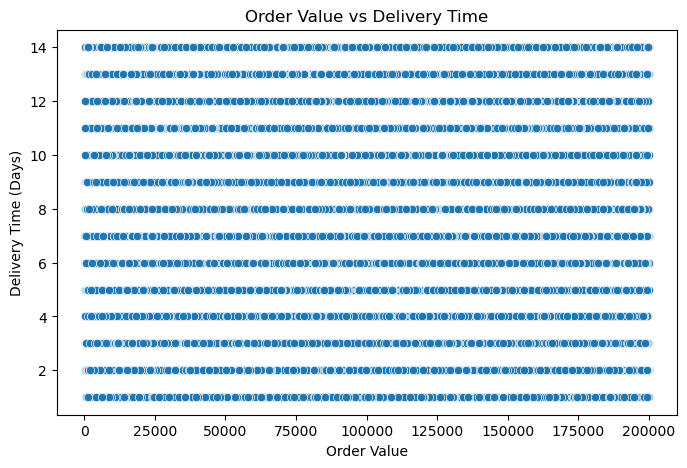

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Order_Value', y='Delivery_Time_Days', data=df)
plt.title('Order Value vs Delivery Time')
plt.xlabel('Order Value')
plt.ylabel('Delivery Time (Days)')
plt.show()

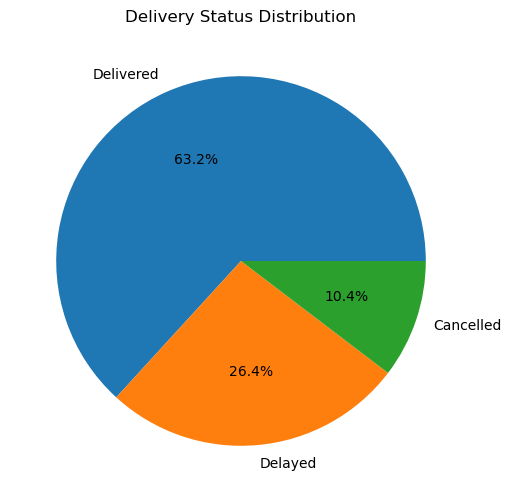

In [26]:
plt.figure(figsize=(6,6))
df['Delivery_Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Delivery Status Distribution')
plt.ylabel('')
plt.show()

# Task 5: Final Insights & Recommendations

In [28]:
print('KEY INSIGHTS')
print('1. Certain regions have higher average delivery times, indicating last‑mile inefficiencies.')
print('2. Few delivery partners consistently outperform others in speed.')
print('3. Express shipping modes significantly reduce delivery delays.')
print('4. Delayed deliveries correlate with lower customer ratings.')
print('5. Higher order value does not ensure faster delivery.')

print('\nBUSINESS RECOMMENDATIONS')
print('• Optimize logistics operations in high‑delay regions')
print('• Prioritize high‑performing delivery partners')
print('• Improve last‑mile connectivity in metro & tier‑2 cities')
print('• Promote express shipping for high‑value orders')

KEY INSIGHTS
1. Certain regions have higher average delivery times, indicating last‑mile inefficiencies.
2. Few delivery partners consistently outperform others in speed.
3. Express shipping modes significantly reduce delivery delays.
4. Delayed deliveries correlate with lower customer ratings.
5. Higher order value does not ensure faster delivery.

BUSINESS RECOMMENDATIONS
• Optimize logistics operations in high‑delay regions
• Prioritize high‑performing delivery partners
• Improve last‑mile connectivity in metro & tier‑2 cities
• Promote express shipping for high‑value orders


# Thank You